|--- Reviews <= -0.15
|   |--- Reviews <= -0.15
|   |   |--- Reviews <= -0.15
|   |   |   |--- class: 0
|   |   |--- Reviews >  -0.15
|   |   |   |--- class: 0
|   |--- Reviews >  -0.15
|   |   |--- Rating <= -0.69
|   |   |   |--- class: 1
|   |   |--- Rating >  -0.69
|   |   |   |--- class: 0
|--- Reviews >  -0.15
|   |--- Price <= 0.01
|   |   |--- Reviews <= -0.15
|   |   |   |--- class: 1
|   |   |--- Reviews >  -0.15
|   |   |   |--- class: 1
|   |--- Price >  0.01
|   |   |--- Reviews <= -0.14
|   |   |   |--- class: 0
|   |   |--- Reviews >  -0.14
|   |   |   |--- class: 1



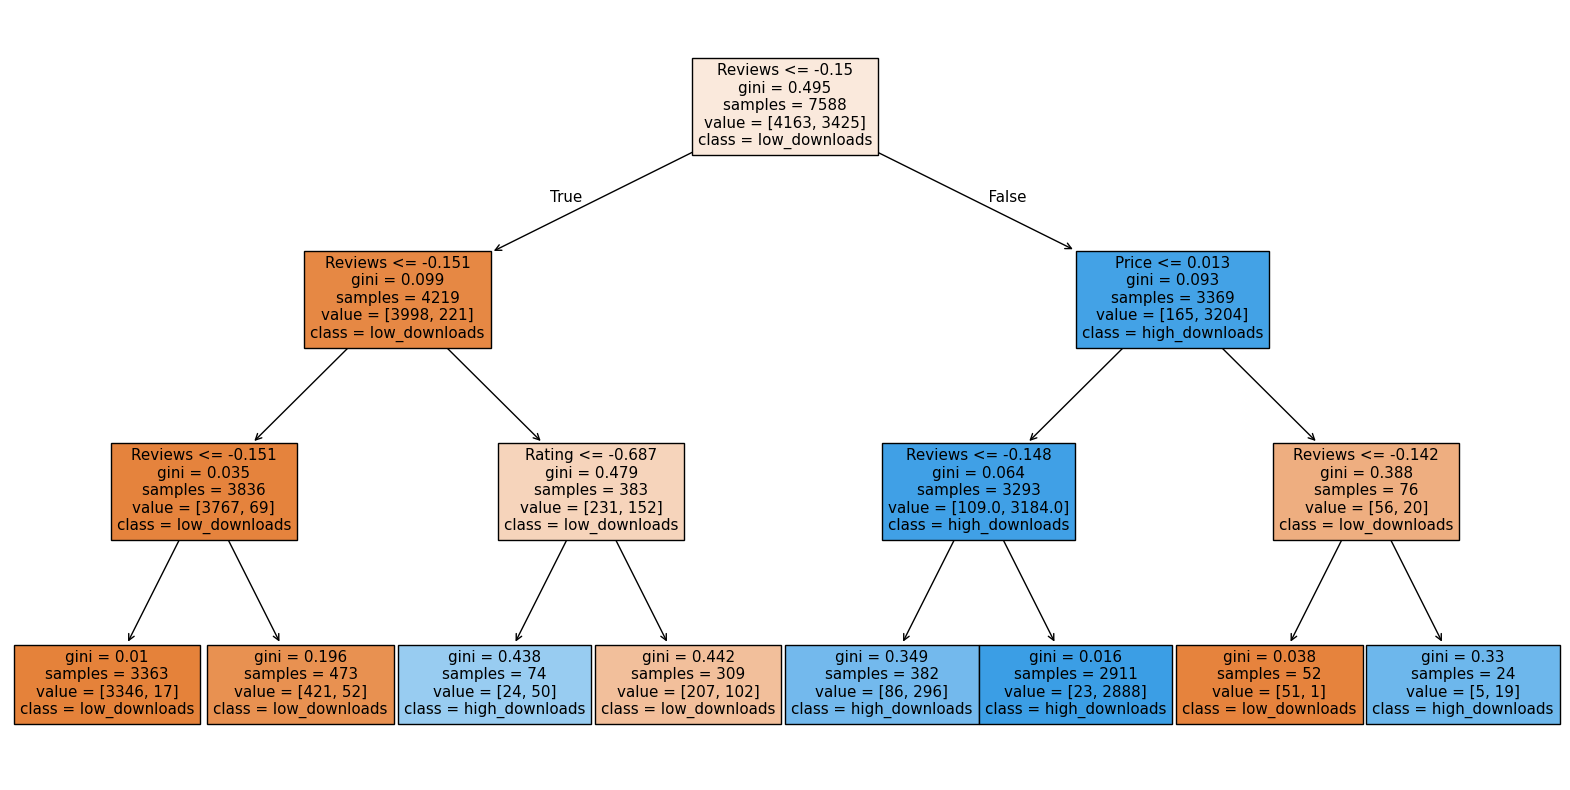

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# 1. Datensatz laden
df = pd.read_csv('input/googleplaystore_bereinigt.csv')

# 2. Zielvariable binär machen (Downloads hoch/niedrig)
median_installs = df['Installs'].median()
df['Target'] = (df['Installs'] > median_installs).astype(int)

# 3. Features und Target definieren
X = df.drop(columns=['Installs', 'Target'])
y = df['Target']

# 4. Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Entscheidungsbaum trainieren
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 6. Baum als Text anzeigen
tree_text = export_text(clf, feature_names=list(X.columns))
print(tree_text)

# 7. Baum visualisieren
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['low_downloads', 'high_downloads'], filled=True)
plt.show()


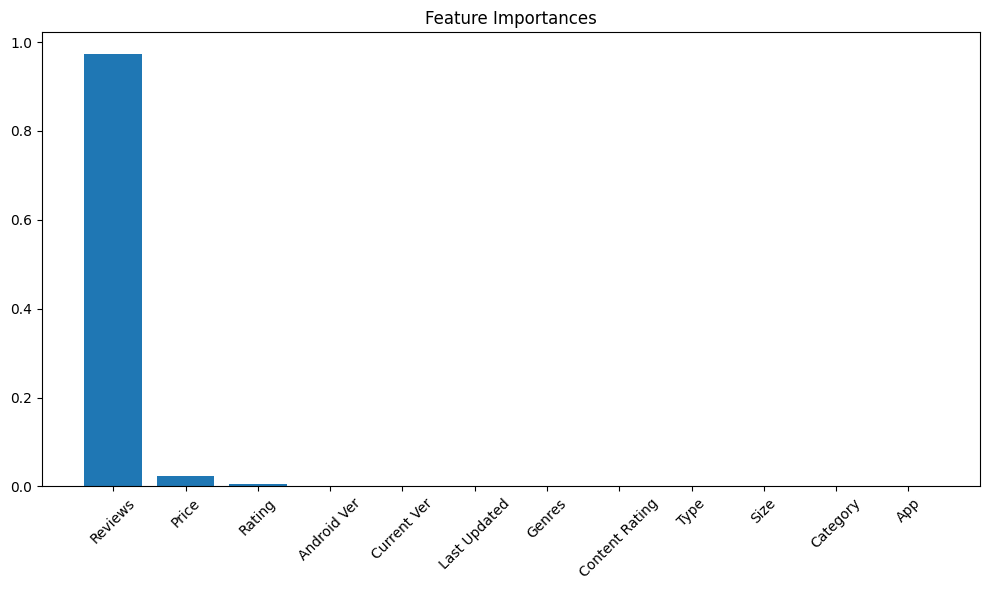

In [6]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


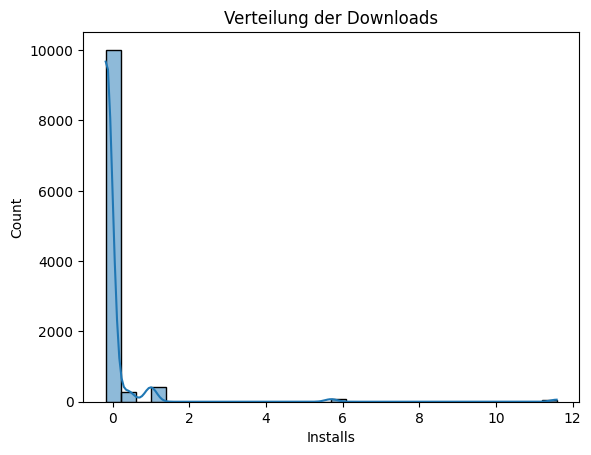

In [7]:
import seaborn as sns

sns.histplot(df['Installs'], bins=30, kde=True)
plt.title("Verteilung der Downloads")
plt.show()


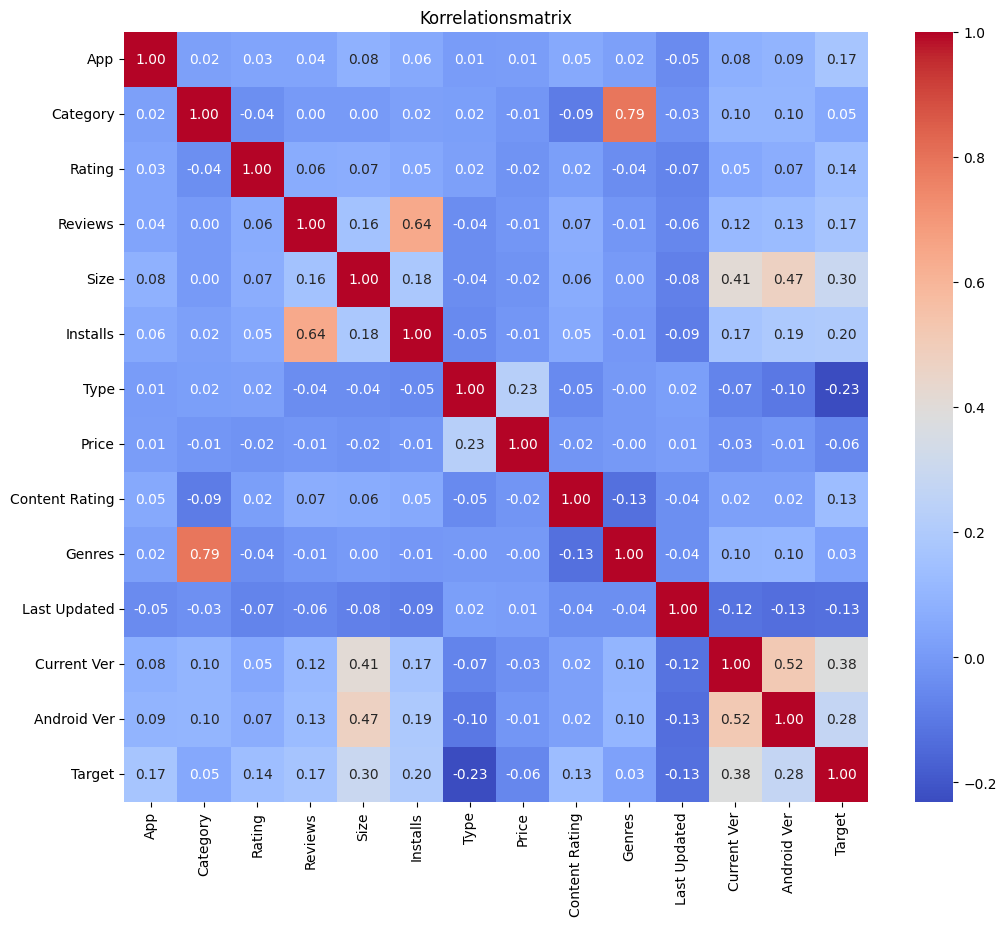

In [8]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()


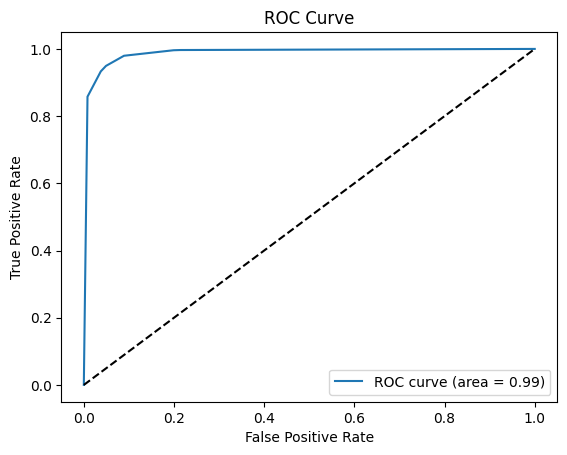

In [9]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


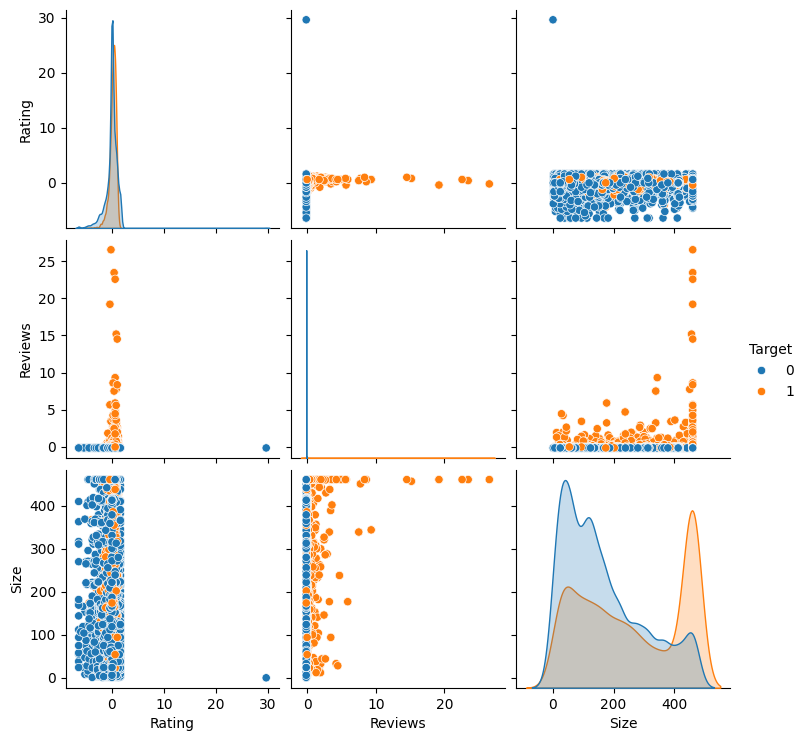

In [10]:
sns.pairplot(df[['Rating', 'Reviews', 'Size', 'Target']], hue='Target')
plt.show()
